In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
data=pd.read_csv("agriculture.csv")
data

,s.no,Species name,Common name,State,City,Optimum temperature in celcius,Initial season,Final season,Climate,Initial rainfall in mm,...,Final leaf size in inches,Leaf shape,Initial fruit weight in grams,Final fruit weight in grams,Fruit color,Initial ripening duration,Final ripening duration,Fruit taste,Diseases,Unnamed: 27
0,1,Magnifera indica,Alphonso,Maharashtra,Ratnigiri,22,Feburary,May,Sub tropical,890,...,16,Elliptical,220,280,Golden yellow,15,17,Incredibly sweet,Spongy tissue,NaN
1,2,Magnifera indica,Alphonso,Maharashtra,Sindhudurg,22,March,June,Tropical,890,...,16,Elliptical,220,280,Golden yellow,15,17,Incredibly sweet,Spongy tissue,NaN
2,3,Magnifera indica,Alphonso,Maharashtra,Sindhudurg,22,March,June,Tropical,890,...,16,Elliptical,220,280,Golden yellow,15,17,Incredibly sweet,Spongy tissue,NaN
3,4,Magnifera indica,Alphonso,Karanataka,Badami,24,March,June,Sub tropical,890,...,16,Elliptical,220,280,Golden yellow,15,17,Very sweet,Spongy tissue,NaN
4,5,Magnifera indica,Alphonso,Karanataka,Badami,24,March,June,Sub tropical,890,...,16,Elliptical,220,280,Golden yellow,15,17,Very sweet,Spongy tissue,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,223,Magnifera indica,Imam pasand,Telengana,Adilabad,27,April,June,Tropical,890,...,7,Oblong,750,850,Reddish yellow,2,7,Sweet taste,Die back,NaN
223,224,Magnifera indica,Imam pasand,Telengana,Nalgonda,27,April,June,Tropical,890,...,7,Oblong,750,850,Reddish yellow,2,7,Sweet taste,Gummosis,NaN
224,225,Magnifera indica,Imam pasand,Telengana,Nalgonda,27,April,June,Tropical,890,...,7,Oblong,750,850,Reddish yellow,2,7,Sweet taste,Sooty mould,NaN
225,226,Magnifera indica,Imam pasand,Telengana,Nalgonda,27,April,June,Tropical,890,...,7,Oblong,750,850,Reddish yellow,2,7,Sweet taste,Malformation,NaN


In [ ]:
data.shape

(227, 28)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   s.no                            227 non-null    int64 
 1   Species name                    227 non-null    object
 2   Common name                     227 non-null    object
 3   State                           227 non-null    object
 4   City                            227 non-null    object
 5   Optimum temperature in celcius  227 non-null    int64 
 6   Initial season                  227 non-null    object
 7   Final season                    227 non-null    object
 8   Climate                         227 non-null    object
 9   Initial rainfall in mm          227 non-null    int64 
 10  Final rainfall in mm            227 non-null    int64 
 11  Soil                            227 non-null    object
 12  Nitrogen content                227 non-null    in

In [ ]:
data.drop_duplicates(inplace=True)   #removing duplicate
data = data.drop('Unnamed: 27', axis=1) #removing a column named unnamed 27
data = data.drop( 's.no' , axis=1)
data = data.drop( 'S no' , axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Species name                    227 non-null    object
 1   Common name                     227 non-null    object
 2   State                           227 non-null    object
 3   City                            227 non-null    object
 4   Optimum temperature in celcius  227 non-null    int64 
 5   Initial season                  227 non-null    object
 6   Final season                    227 non-null    object
 7   Climate                         227 non-null    object
 8   Initial rainfall in mm          227 non-null    int64 
 9   Final rainfall in mm            227 non-null    int64 
 10  Soil                            227 non-null    object
 11  Nitrogen content                227 non-null    int64 
 12  Phosphorus content              227 non-null    in

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import chi2, f_classif


In [ ]:
imputer = SimpleImputer(strategy='mean')
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

label_encoders = {}
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Standardize the data
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

zero_variance_columns = data.loc[:, (data.var() == 0).values].columns  #check zero variance which might result in nan in correlation
data = data.drop(columns=zero_variance_columns)

print("\nPreprocessed DataFrame:")
print(data.head())



Preprocessed DataFrame:
   Common name  State  City  Optimum temperature in celcius  Initial season  \
0            0      7    25                       -2.117460               1   
1            0      7    27                       -2.117460               3   
2            0      7    27                       -2.117460               3   
3            0      3     3                       -0.852556               3   
4            0      3     3                       -0.852556               3   

   Final season  Climate  Soil  Nitrogen content  Phosphorus content  ...  \
0             4        0     3          0.844593            0.606339  ...   
1             2        1     1          0.116440            0.750754  ...   
2             2        1     1          0.116440            0.750754  ...   
3             2        0     3          0.844593            0.606339  ...   
4             2        0     0          1.878569            1.448757  ...   

   Initial leaf size in inches  Final

In [ ]:
correlation_matrix = data.corr()
print(correlation_matrix)

                                Common name     State      City  \
Common name                        1.000000 -0.002998  0.160823   
State                             -0.002998  1.000000  0.162933   
City                               0.160823  0.162933  1.000000   
Optimum temperature in celcius    -0.484916 -0.208650 -0.127816   
Initial season                     0.144964  0.019509 -0.085277   
Final season                       0.139072  0.146001 -0.001315   
Climate                            0.105916  0.309231 -0.026661   
Soil                               0.392428 -0.043388  0.091034   
Nitrogen content                  -0.370550  0.025244 -0.077991   
Phosphorus content                -0.522090  0.003118 -0.242830   
Leaf color                         0.267398 -0.110932 -0.119024   
Initial leaf size in inches       -0.458379  0.035401 -0.166955   
Final leaf size in inches         -0.440217  0.050196 -0.048019   
Leaf shape                         0.468923 -0.254767  0.02000

In [ ]:
# Assuming 'Diseases' is the target variable
X = data.drop('Diseases', axis=1)
y = data['Diseases']

negative_values = X < 0
# Replace negative values with 0 as we cant perform as value of x is negative
X[negative_values] = 0

chi_scores, p_values = chi2(X, y)
chi2_results = pd.DataFrame({
    'Feature': X.columns,
    'Chi-Squared Score': chi_scores,
    'p-value': p_values
})
print("\nChi-Squared Test Results:")
print(chi2_results)


Chi-Squared Test Results:
                           Feature  Chi-Squared Score       p-value
0                      Common name         178.495440  3.935121e-25
1                            State          76.017537  4.737250e-07
2                             City         115.244413  1.513589e-13
3   Optimum temperature in celcius          55.077598  4.807321e-04
4                   Initial season          89.064995  4.063052e-09
5                     Final season          52.869934  9.290277e-04
6                          Climate           6.614039  9.999123e-01
7                             Soil          98.279493  1.220750e-10
8                 Nitrogen content         118.012525  4.955142e-14
9               Phosphorus content          48.058241  3.670184e-03
10                      Leaf color         101.093977  4.102348e-11
11     Initial leaf size in inches          93.406383  7.894849e-10
12       Final leaf size in inches          50.701452  1.744731e-03
13                   

In [ ]:
anova_f_scores, p_values = f_classif(X, y)
anova_results = pd.DataFrame({
    'Feature': X.columns,
    'F-Score': anova_f_scores,
    'p-value': p_values
})
print("\nANOVA Test Results:")
print(anova_results)


ANOVA Test Results:
                           Feature    F-Score       p-value
0                      Common name   7.181785  4.309492e-17
1                            State   1.752183  1.872387e-02
2                             City   0.751238  7.988753e-01
3   Optimum temperature in celcius   3.343013  1.060453e-06
4                   Initial season   3.480119  4.345364e-07
5                     Final season   2.767497  4.337723e-05
6                          Climate   1.592791  4.270041e-02
7                             Soil   5.607167  5.334959e-13
8                 Nitrogen content   5.176832  7.826458e-12
9               Phosphorus content   3.787734  5.859431e-08
10                      Leaf color   5.156048  8.920285e-12
11     Initial leaf size in inches   8.624698  1.359861e-20
12       Final leaf size in inches   4.015014  1.336246e-08
13                      Leaf shape   5.529851  8.615245e-13
14   Initial fruit weight in grams   4.425934  9.357903e-10
15     Final fruit 

# Recursive Feature elimination


In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeRegressor

# Initialize a DecisionTreeRegressor model
dtree = DecisionTreeRegressor()

# Create an RFECV object
rfecv = RFECV(estimator=dtree, step=1, scoring='neg_mean_squared_error', cv=2, verbose=1, n_jobs=-1)

# Fit the RFECV object on the data
rfecv.fit(X, y)

# Print the number of features selected
print("Optimal number of features:", rfecv.n_features_)

# Print the indices of the selected features
print("Selected features:", np.where(rfecv.support_ == True)[0])


Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Optimal number of features: 3
Selected features: [ 0  5 19]


In [ ]:
# Get the indices of the selected features
selected_features_indices = np.where(rfecv.support_ == True)[0]

# Get the names of the selected features
selected_features_names = X.columns[selected_features_indices]

# Display only the selected features from the data
X_selected = X[selected_features_names]

print(X_selected)

     Common name  Final season  Fruit taste
0              0             4            2
1              0             2            2
2              0             2            2
3              0             2            8
4              0             2            8
..           ...           ...          ...
222            4             2            5
223            4             2            5
224            4             2            5
225            4             2            5
226            4             2            5

[227 rows x 3 columns]


# Mutual Information

Selected features: ['Common name', 'Leaf color', 'Fruit color', 'Fruit taste', 'Final fruit weight in grams']


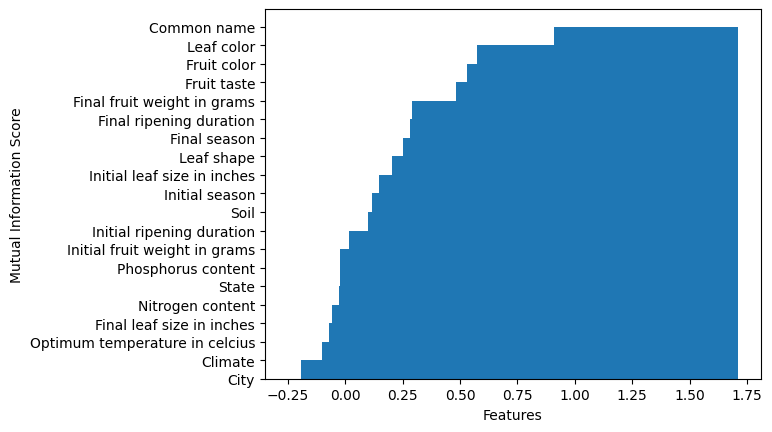

In [ ]:

import numpy as np
from sklearn.feature_selection import mutual_info_classif

# Calculate the mutual information between each feature and the target variable
mi = mutual_info_classif(X, y)

# Sort the features based on their mutual information scores
mi_scores = sorted(zip(mi, X.columns), reverse=True)

# Select the top k features with the highest mutual information scores
k = 5  # Number of features to select
selected_features = [feature for _, feature in mi_scores[:k]]

# Create a new DataFrame with the selected features
X_selected = X[selected_features]

# Print the selected features
print("Selected features:", selected_features)

import matplotlib.pyplot as plt

# Sort the mutual information scores
mi_scores = sorted(zip(mi, X.columns), reverse=False)

# Extract the features and scores
features, scores = zip(*mi_scores)

# Create a bar chart
plt.bar(features, scores)
plt.xlabel("Features")
plt.ylabel("Mutual Information Score")
plt.show()

[1.35615525 0.42822186 0.13870869 0.37619051 0.55975707 0.4902894
 0.29042031 0.47080644 0.37864573 0.4006394  0.9667733  0.57947739
 0.39342183 0.45158875 0.28760773 0.65081292 0.97159862 0.39910331
 0.50570053 1.02738576]
0     1.356155
19    1.027386
16    0.971599
10    0.966773
15    0.650813
11    0.579477
4     0.559757
18    0.505701
5     0.490289
7     0.470806
13    0.451589
1     0.428222
9     0.400639
17    0.399103
12    0.393422
8     0.378646
3     0.376191
6     0.290420
14    0.287608
2     0.138709
dtype: float64


<Axes: >

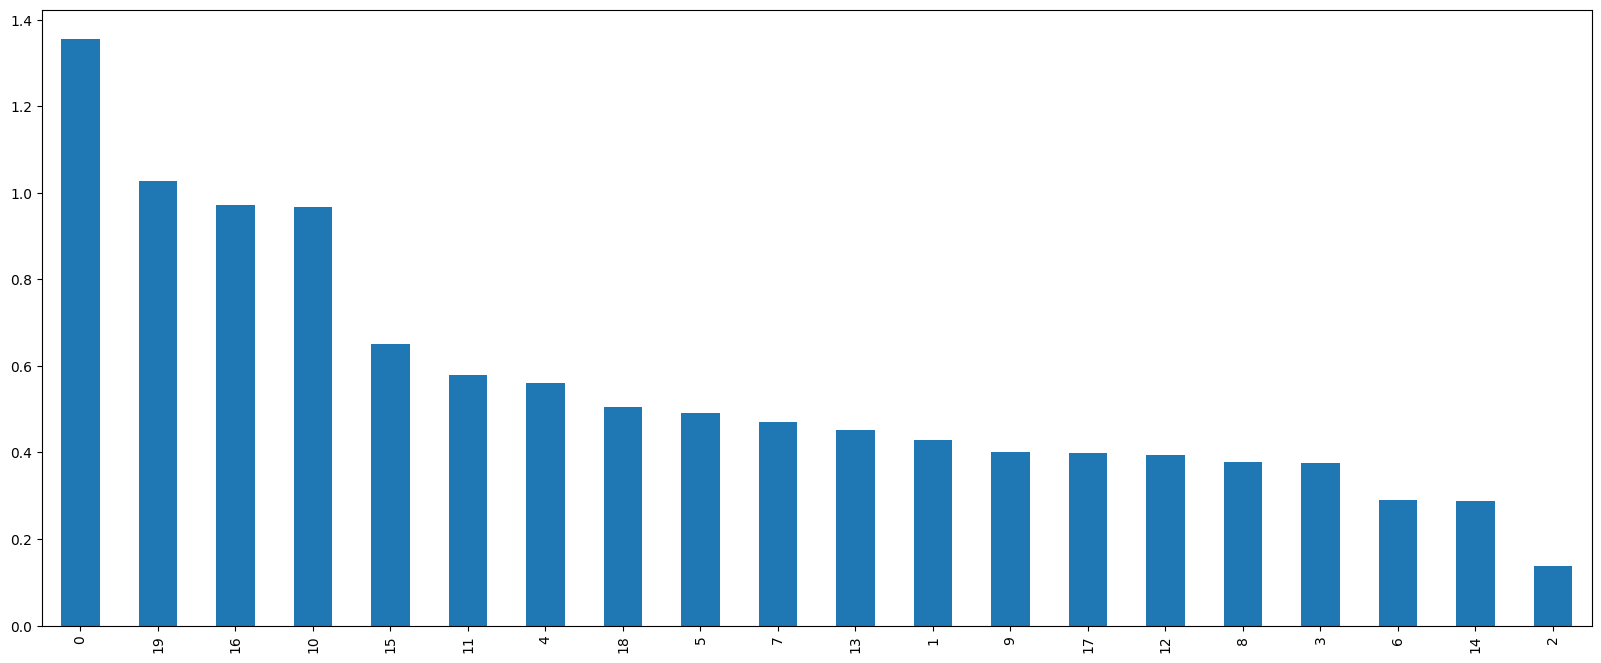

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_info= mutual_info_classif(X,y.values.ravel())
print(mutual_info)

mutual_info_series = pd.Series(mutual_info)
sorted_mutual_info = mutual_info_series.sort_values(ascending=False)
print(sorted_mutual_info)
sorted_mutual_info.plot.bar(figsize=(20,8))

In [ ]:
from sklearn.feature_selection import SelectKBest
sel_cols = SelectKBest(mutual_info_classif,k=7)
X_train=sel_cols.fit_transform(X,y)
print("Train set:",X_train.shape)
test_X = sel_cols.transform(X)
print("Test set: ",test_X.shape)


Train set: (227, 7)
Test set:  (227, 7)


# Forward Selection

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

# Initialize a DecisionTreeRegressor model
dtree = DecisionTreeRegressor()

# Create a SequentialFeatureSelector object
sfs = SequentialFeatureSelector(dtree, n_features_to_select=5, direction='forward')

# Fit the SFS object on the data
sfs.fit(X, y)

# Print the number of features selected
print("Optimal number of features:", sfs.n_features_to_select)

# Print the indices of the selected features
print("Selected features:", np.where(sfs.support_ == True)[0])

# Get the names of the selected features
selected_features_names = X.columns[np.where(sfs.support_ == True)[0]]

# Display only the selected features from the data
X_selected = X[selected_features_names]

print(X_selected)


Optimal number of features: 5
Selected features: [ 3 13 16 17 18]
     Optimum temperature in celcius  Leaf shape  Fruit color  \
0                          0.000000           0            0   
1                          0.000000           0            0   
2                          0.000000           0            0   
3                          0.000000           0            0   
4                          0.000000           0            0   
..                              ...         ...          ...   
222                        1.044799           2            3   
223                        1.044799           2            3   
224                        1.044799           2            3   
225                        1.044799           2            3   
226                        1.044799           2            3   

     Initial ripening duration  Final ripening duration  
0                     3.362097                 3.336934  
1                     3.362097                 3.

# Backward elimination


In [ ]:

import numpy as np
# Initialize a DecisionTreeRegressor model
dtree = DecisionTreeRegressor()

# Create a SequentialFeatureSelector object with backward selection
sfs = SequentialFeatureSelector(dtree, n_features_to_select=5, direction='backward')

# Fit the SFS object on the data
sfs.fit(X, y)

# Print the number of features selected
print("Optimal number of features:", sfs.n_features_to_select)

# Print the indices of the selected features
print("Selected features:", np.where(sfs.support_ == True)[0])

# Get the names of the selected features
selected_features_names = X.columns[np.where(sfs.support_ == True)[0]]

# Display only the selected features from the data
X_selected = X[selected_features_names]

print(X_selected)


Optimal number of features: 5
Selected features: [ 3 13 16 18 19]
     Optimum temperature in celcius  Leaf shape  Fruit color  \
0                          0.000000           0            0   
1                          0.000000           0            0   
2                          0.000000           0            0   
3                          0.000000           0            0   
4                          0.000000           0            0   
..                              ...         ...          ...   
222                        1.044799           2            3   
223                        1.044799           2            3   
224                        1.044799           2            3   
225                        1.044799           2            3   
226                        1.044799           2            3   

     Final ripening duration  Fruit taste  
0                   3.336934            2  
1                   3.336934            2  
2                   3.336934     

# Exhaustive Feature selection

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

# Initialize a DecisionTreeRegressor model
dtree = DecisionTreeRegressor()

# Create a SequentialFeatureSelector object
sfs = SequentialFeatureSelector(dtree, n_features_to_select=5, direction='backward')

# Fit the SFS object on the data
sfs.fit(X, y)

# Print the number of features selected
print("Optimal number of features:", sfs.n_features_to_select)

# Print the indices of the selected features
print("Selected features:", np.where(sfs.support_ == True)[0])

# Get the names of the selected features
selected_features_names = X.columns[np.where(sfs.support_ == True)[0]]

# Display only the selected features from the data
X_selected = X[selected_features_names]

print(X_selected)

Optimal number of features: 5
Selected features: [ 9 13 14 15 16]
     Phosphorus content  Leaf shape  Initial fruit weight in grams  \
0              0.606339           0                       0.000000   
1              0.750754           0                       0.000000   
2              0.750754           0                       0.000000   
3              0.606339           0                       0.000000   
4              1.448757           0                       0.000000   
..                  ...         ...                            ...   
222            0.000000           2                       2.389864   
223            0.000000           2                       2.389864   
224            0.000000           2                       2.389864   
225            0.000000           2                       2.389864   
226            0.000000           2                       2.389864   

     Final fruit weight in grams  Fruit color  
0                       0.000000            0